In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import chi2, entropy
from collections import Counter

from utils import flatten,rolling_window,get_click_data
from vlmc import MCM


# 1 Get Click Data

In [2]:
clicks = get_click_data()

/tmp/ipykernel_3003289/2062889381.py:1: DtypeWarning: Columns (46,49) have mixed types.Specify dtype option on import or set low_memory=False.
  clicks = get_click_data()


In [3]:
resolutions = [0.01, 0.02]
depths = np.arange(1,11)
horizon = 1.5
whale = 'ATWOOD'

# 2 Mean and Variance of Transition

In [5]:
variances,means=[],[]
for resolution in resolutions:
    inner_variances,inner_means=[],[]
    for depth in depths:
    
        model = MCM(depth=depth,resolution=resolution,
                        horizon=horizon,whale=whale).fit(clicks,entropy_toggle=False) #entropy_toggle = FALSE!

        inner_variances.append(np.var(model.A,axis=0,where=model.A!=0)) #carefull with zero entries in matrix A!!
        inner_means.append(np.mean(model.A,axis=0,where=model.A!=0))
    variances.append(inner_variances);means.append(inner_means)

/home/antonio/foldah/foldahenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/antonio/foldah/foldahenv/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/antonio/foldah/foldahenv/lib/python3.8/site-packages/numpy/core/_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/antonio/foldah/foldahenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/antonio/foldah/foldahenv/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


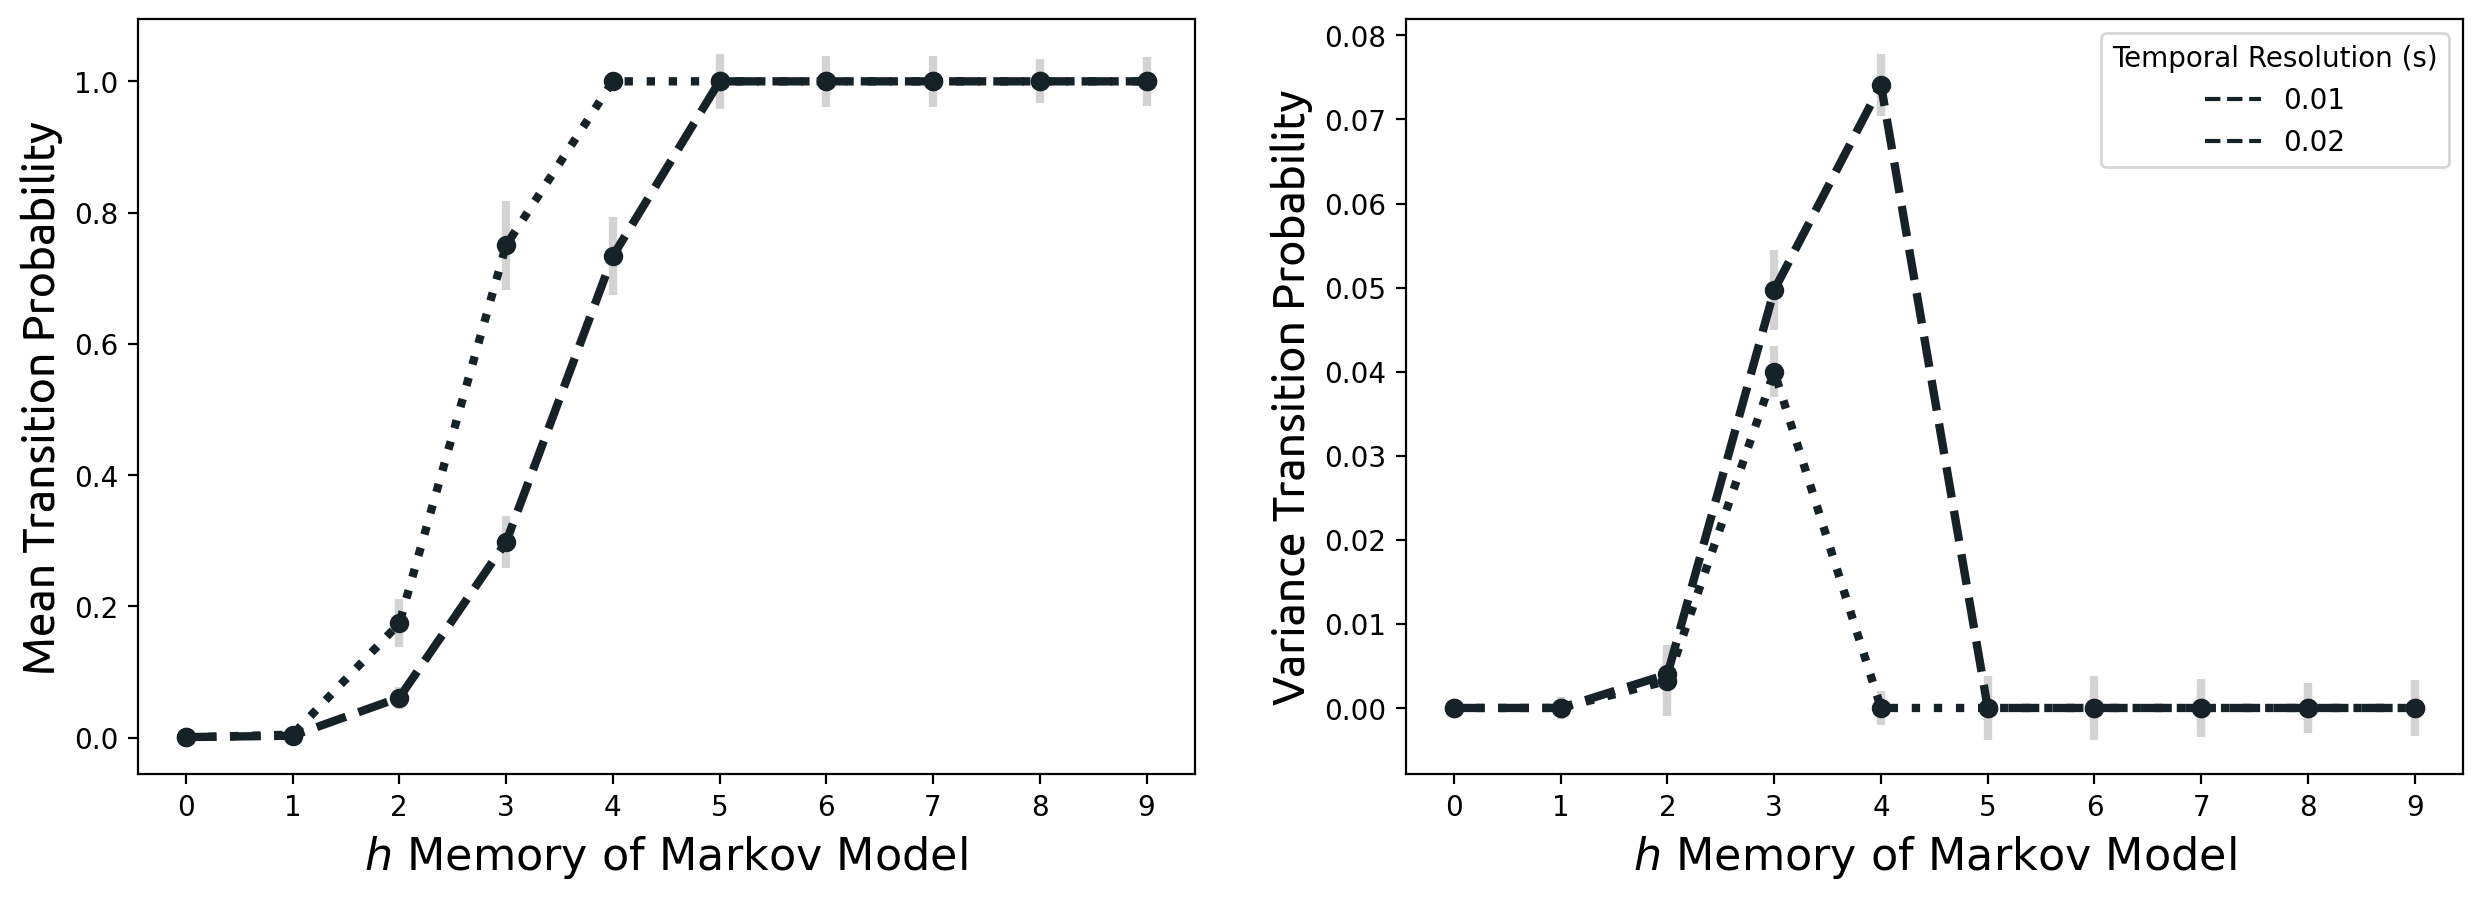

In [8]:
BG = '#152228'

plt.figure(figsize=(15,5),dpi=200)
for i,label,series in zip(range(1,3),['Mean', 'Variance'],[means,variances]):
    plt.subplot(1,2,i)
    
    for values,resolution,linestyle in zip(series,resolutions[:3],[':','--','-','-']):

        plt.errorbar(depths-1, np.nanmedian(values,axis=1), yerr = np.nanvar(values,axis=1),
                     color=BG, ecolor='lightgray', elinewidth=3, capsize=0,
                     marker='o',linestyle=linestyle,linewidth=3)
        
    plt.xticks(depths-1)
    
    plt.ylabel(f'{label} Transition Probability',fontsize=16,fontfamily='Ubuntu')
    plt.xlabel('$h$ Memory of Markov Model',fontsize=16)
#plt.suptitle('For varying Bin size',fontsize=17)
plt.plot([],[],label='0.01',color=BG,linestyle='--')
plt.plot([],[],label='0.02',color=BG,linestyle='--')
plt.legend(title='Temporal Resolution (s)')
plt.show()

In [19]:
def mean_connections(model):
    rows, cols = model.A.nonzero()
    u,counts = np.unique(rows, return_counts=True)
    return np.mean(counts)

cc1=[mean_connections(MCM(depth=depth).fit(clicks,entropy_toggle=False)) for depth in depths]
cc2=[mean_connections(MCM(depth=depth,resolution=0.01).fit(clicks,entropy_toggle=False)) for depth in depths]

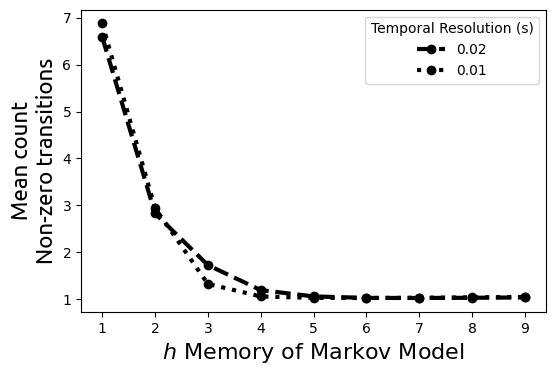

In [28]:
plt.figure(dpi=100)
plt.plot(depths[1:]-1,cc1[1:],marker='o',linestyle='--',linewidth=3,label=0.02,color='k')
plt.plot(depths[1:]-1,cc2[1:],marker='o',linestyle=':',linewidth=3,label=0.01,color='k')
plt.xticks(depths[1:]-1)
    
plt.ylabel('Mean count\nNon-zero transitions',fontsize=16,fontfamily='Ubuntu')
plt.xlabel('$h$ Memory of Markov Model',fontsize=16)
plt.legend(title='Temporal Resolution (s)')